In [1]:
import librosa
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import os

In [6]:
import soundfile as sf
import matplotlib.pyplot as plt


## Combine 120 sound files to one

In [3]:
num_file_to_combine = 120

datset_path = "16000_pcm_speeches"
output_path = "combined_voice"

speaker_folders = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]

for speaker_f in speaker_folders:
    speaker_path = os.path.join(datset_path, speaker_f)
    
    #list the first 120 .wav files
    wave_files = [f"{i}.wav" for i in range(num_file_to_combine)]

    #combine the first 120 .wav files
    combined_wave = []
    for wave_file in wave_files:
        wave, sr = librosa.load(os.path.join(speaker_path, wave_file), sr=None)
        combined_wave.extend(wave)

    #save the combined wave
    speaker_output_path = os.path.join(output_path, f"{speaker_f}_combined.wav")
    sf.write(speaker_output_path, np.array(combined_wave), sr)


## Data visualization

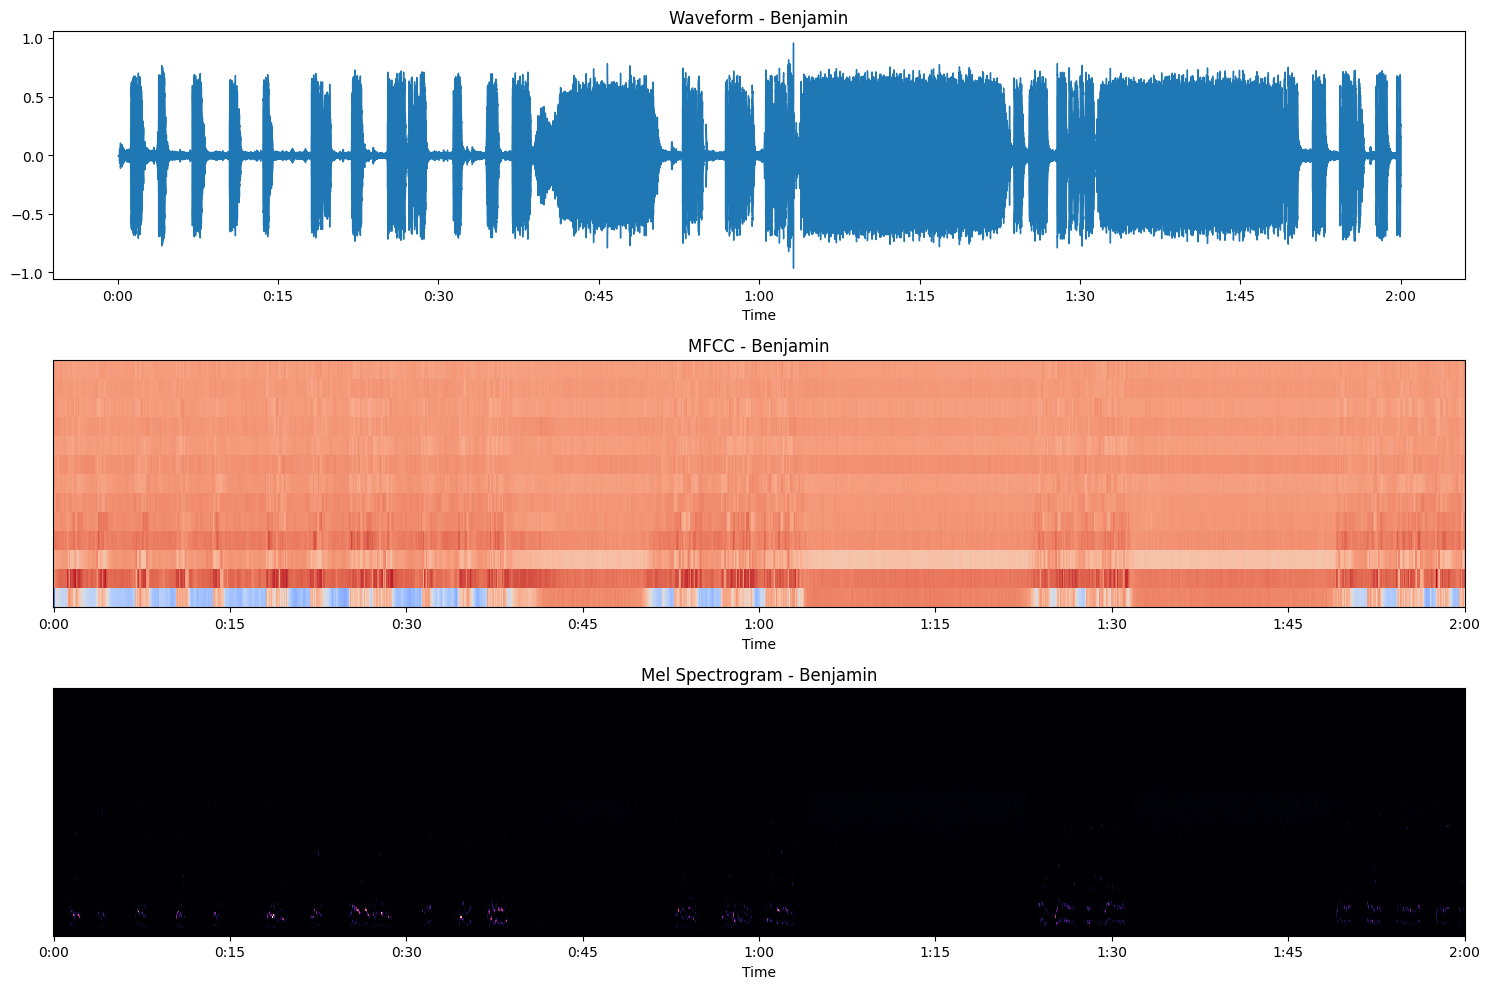

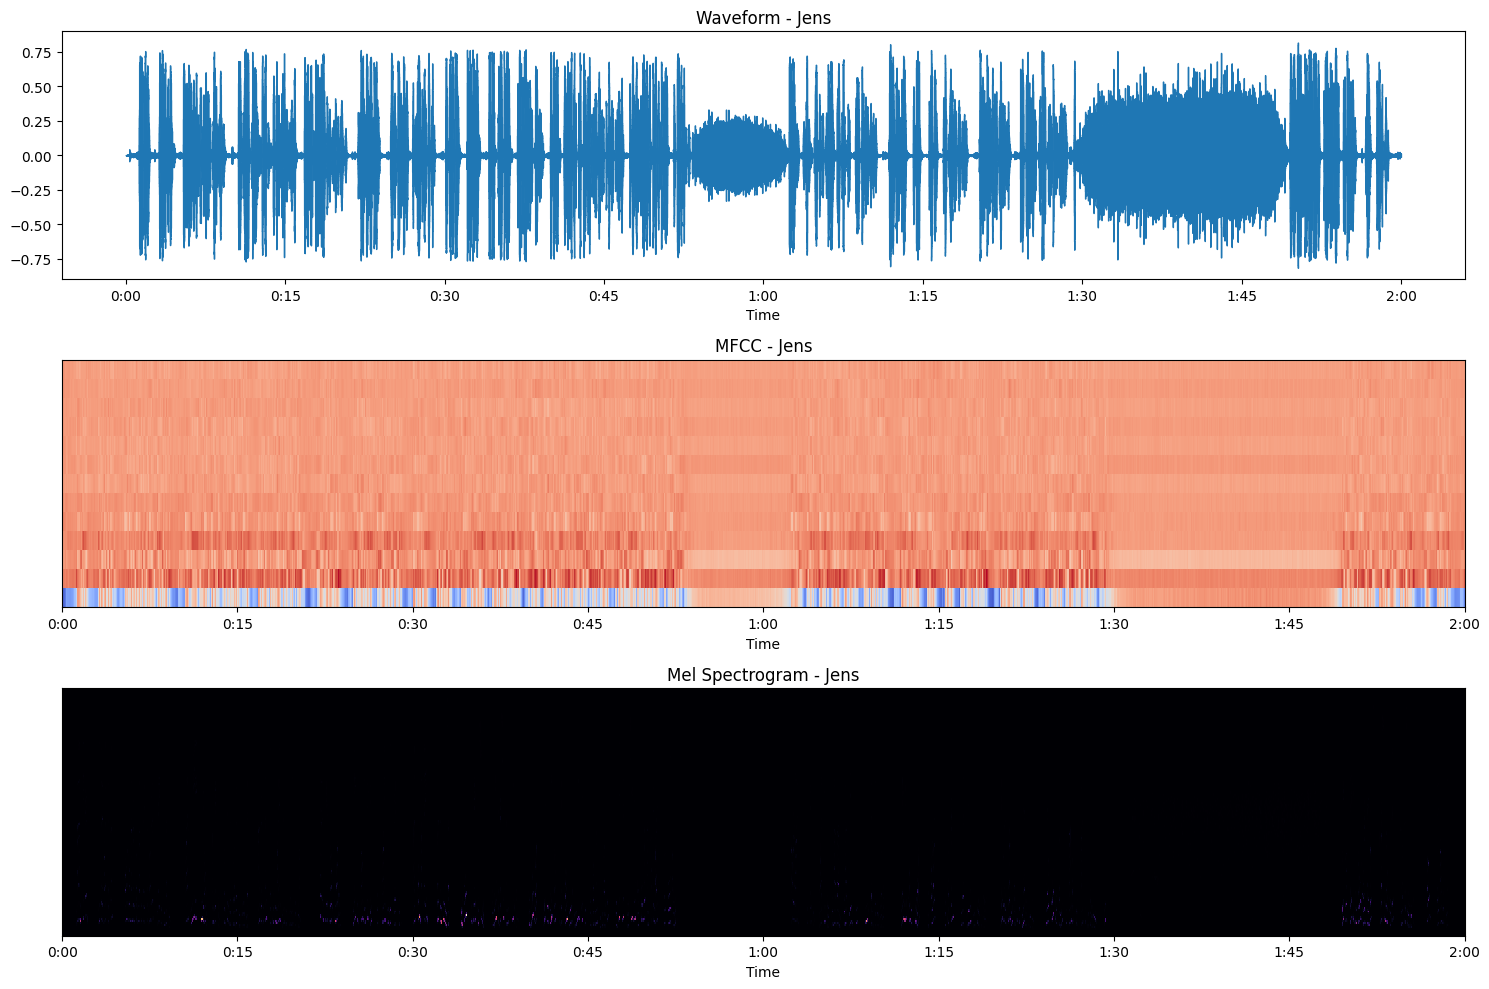

In [15]:
import librosa.display

def plot_audio_feature(audio_path):
    y, sr = librosa.load(audio_path, sr=None)

    speaker_name = os.path.basename(audio_path).split('_')[0]


    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {speaker_name}')

    plt.subplot(3, 1, 2)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.title(f'MFCC - {speaker_name}')

    plt.subplot(3, 1, 3)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time')
    plt.title(f'Mel Spectrogram - {speaker_name}')

    plt.tight_layout()
    plt.show()


audio_path= [
    "combined_voice\Benjamin_Netanyau_combined.wav",
    "combined_voice\Jens_Stoltenberg_combined.wav",
]


for audio in audio_path:
    plot_audio_feature(audio)
    


## Feature Extraction